# Forecasting

In [ ]:
install.packages('fpp')
install.packages('dplyr')

Installing package into ‘/home/anfiniti/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/anfiniti/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(lubridate)
library(fpp)
library(dplyr)
penjualan <- read.csv('data_penjualan_produk_cetakan.csv',sep = ';')

print(penjualan)

        Tanggal                 Jenis.Produk Jumlah.Order Harga    Total
1    05/08/2022                   Foodpak260         1000  1800  1800000
2    05/08/2022              FoodpakMatte245         1000  1900  1900000
3    05/08/2022             CraftLaminasi290         5000   750  3750000
4    05/08/2022             CraftLaminasi290         1000  1200  1200000
5    07/08/2022                   Dupleks310         1000  1550  1550000
6    08/08/2022                   Dupleks310          500  1900   950000
7    08/08/2022                     Ivory270         1000  1700  1700000
8    09/08/2022                  Kinstruk130         1000  1000  1000000
9    09/08/2022                          HVS         1500   850  1275000
10   09/08/2022                   Dupleks350          500  1800   900000
11   09/08/2022                   Dupleks350          500  1800   900000
12   10/08/2022                   Dupleks310          500  1600   800000
13   10/08/2022                     Ivory270       

In [ ]:
# Mengubah kolom 'Tanggal' menjadi format Date (asumsinya format Tanggal adalah 'dd/mm/yyyy')
penjualan <- penjualan %>%
  mutate(Tanggal = dmy(Tanggal)) # Mengubah format Tanggal ke Date

# Menambah kolom 'Bulan' dan 'Tahun'
penjualan <- penjualan %>%
  mutate(
    Bulan = month(Tanggal),  # Menambah kolom Bulan
    Tahun = year(Tanggal)    # Menambah kolom Tahun
  )

# Melihat hasil
print(penjualan)


        Tanggal                 Jenis.Produk Jumlah.Order Harga    Total Bulan
1    2022-08-05                   Foodpak260         1000  1800  1800000     8
2    2022-08-05              FoodpakMatte245         1000  1900  1900000     8
3    2022-08-05             CraftLaminasi290         5000   750  3750000     8
4    2022-08-05             CraftLaminasi290         1000  1200  1200000     8
5    2022-08-07                   Dupleks310         1000  1550  1550000     8
6    2022-08-08                   Dupleks310          500  1900   950000     8
7    2022-08-08                     Ivory270         1000  1700  1700000     8
8    2022-08-09                  Kinstruk130         1000  1000  1000000     8
9    2022-08-09                          HVS         1500   850  1275000     8
10   2022-08-09                   Dupleks350          500  1800   900000     8
11   2022-08-09                   Dupleks350          500  1800   900000     8
12   2022-08-10                   Dupleks310        

In [ ]:
data_bulan_tahun <- penjualan %>% select(Bulan,Tahun,Total) %>% group_by(Bulan,Tahun) %>% summarise(total_sales=sum(Total))
data_sorting <- arrange(select(data_bulan_tahun,Bulan,Tahun,total_sales),Tahun)
print(data_sorting)

`summarise()` has grouped output by 'Bulan'. You can override using the
`.groups` argument.


# A tibble: 16 × 3
# Groups:   Bulan [12]
   Bulan Tahun total_sales
   <dbl> <dbl>       <int>
 1     8  2022   114070000
 2     9  2022   168840000
 3    10  2022   124147500
 4    11  2022   141677500
 5    12  2022   174540000
 6     1  2023   166937500
 7     2  2023   128140376
 8     3  2023   139353500
 9     4  2023   162246050
10     5  2023   179575000
11     6  2023   123122500
12     7  2023   209895000
13     8  2023   258772500
14     9  2023   139027500
15    10  2023   180327500
16    11  2023   113437500


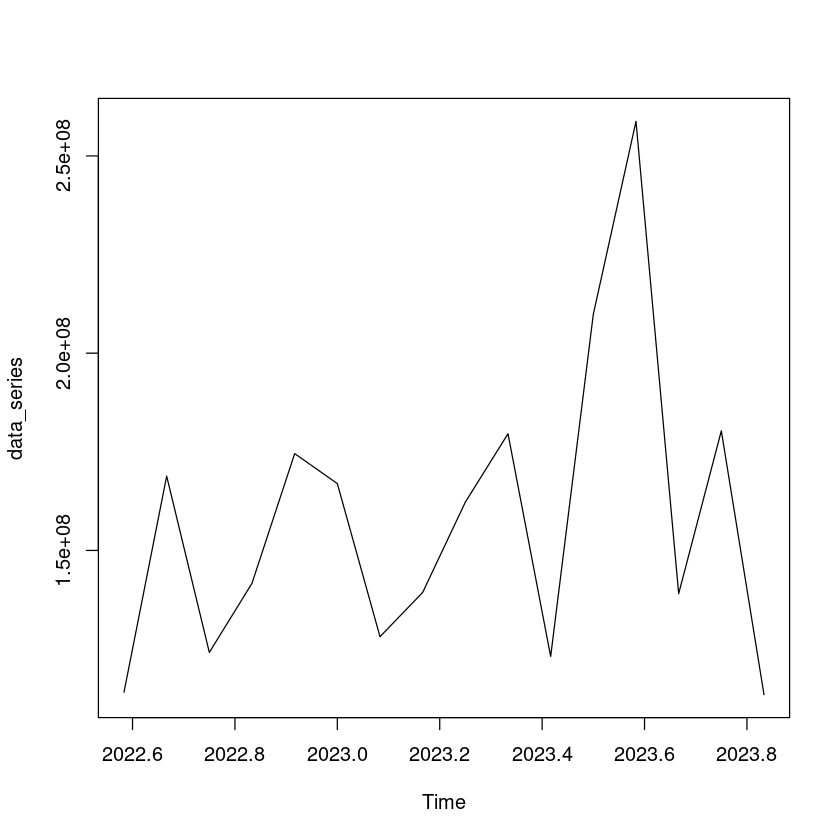

In [ ]:
data_series = ts(data_sorting$total_sales,start=c(2022, 8, end=c(2023, 11), frequency = 12))
plot(data_series)

# Metode Exponential State Smoothing(ETS)


Forecast method: ETS(M,N,N)

Model Information:
ETS(M,N,N) 

Call:
ets(y = data_series)

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 149952743.6548 

  sigma:  0.2727

     AIC     AICc      BIC 
609.0771 611.0771 611.3948 

Error measures:
                  ME     RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 7803154 38258367 29886393 0.1506338 18.22171 0.4616818 -0.03363687

Forecasts:
         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Dec 2023      149965265 97546353 202384178 69797456 230133074
Jan 2024      149965265 97546352 202384178 69797456 230133074
Feb 2024      149965265 97546352 202384178 69797455 230133075
Mar 2024      149965265 97546352 202384179 69797455 230133075
Apr 2024      149965265 97546351 202384179 69797455 230133076
May 2024      149965265 97546351 202384179 69797454 230133076
Jun 2024      149965265 97546351 202384179 69797454 230133077
Jul 2024      149965265 97546351 202384180 69797453 230133077
Au

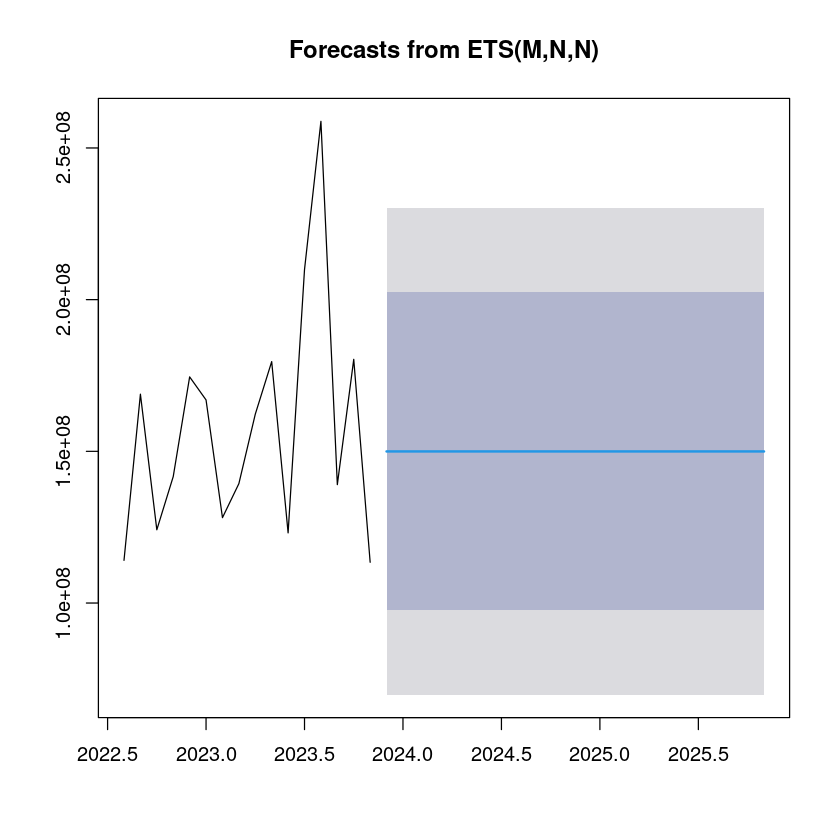

In [ ]:
model_ets = ets(data_series)
ets_24 = forecast(model_ets, h=24)
plot(ets_24)
summary(ets_24)


Forecast method: ARIMA(0,0,0) with non-zero mean

Model Information:
Series: data_series 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
           mean
      157756870
s.e.    9340385

sigma^2 = 1.496e+15:  log likelihood = -301.72
AIC=607.44   AICc=608.36   BIC=608.99

Error measures:
             ME     RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set  0 37453293 29884823 -5.045029 19.16867 0.4616575 -0.03356114

Forecasts:
         Point Forecast     Lo 80     Hi 80    Lo 95     Hi 95
Dec 2023      157756870 108184412 207329329 81942337 233571403
Jan 2024      157756870 108184412 207329329 81942337 233571403
Feb 2024      157756870 108184412 207329329 81942337 233571403
Mar 2024      157756870 108184412 207329329 81942337 233571403
Apr 2024      157756870 108184412 207329329 81942337 233571403
May 2024      157756870 108184412 207329329 81942337 233571403
Jun 2024      157756870 108184412 207329329 81942337 233571403
Jul 2024      157756870 108184412 207329329 

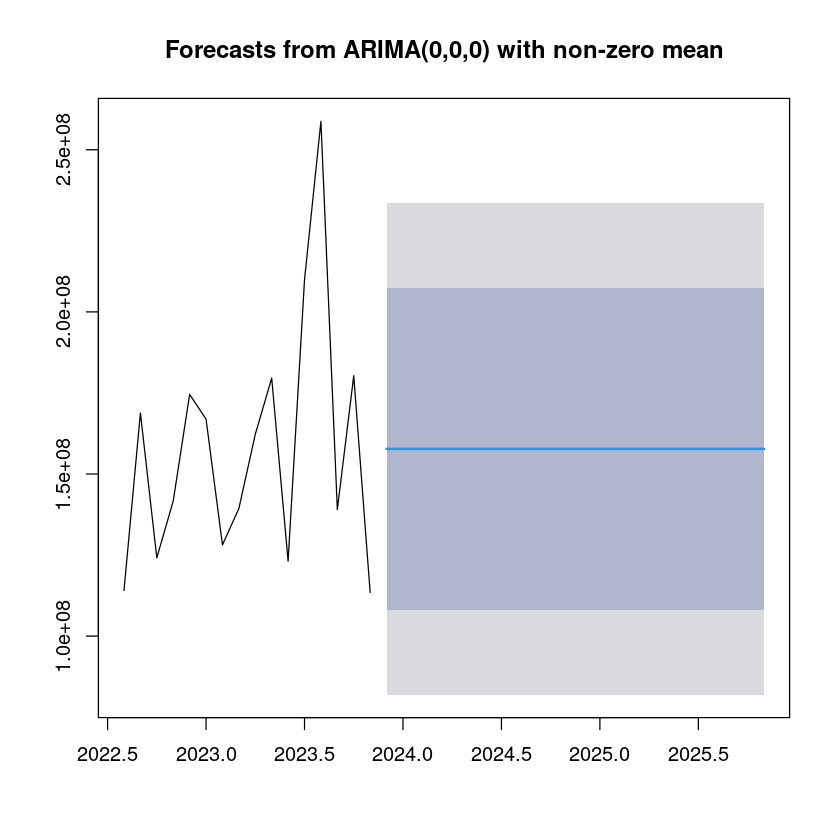

In [ ]:
model_arima = auto.arima(data_series)
arima_24 = forecast(model_arima, h=24)
plot(arima_24)
summary(arima_24)

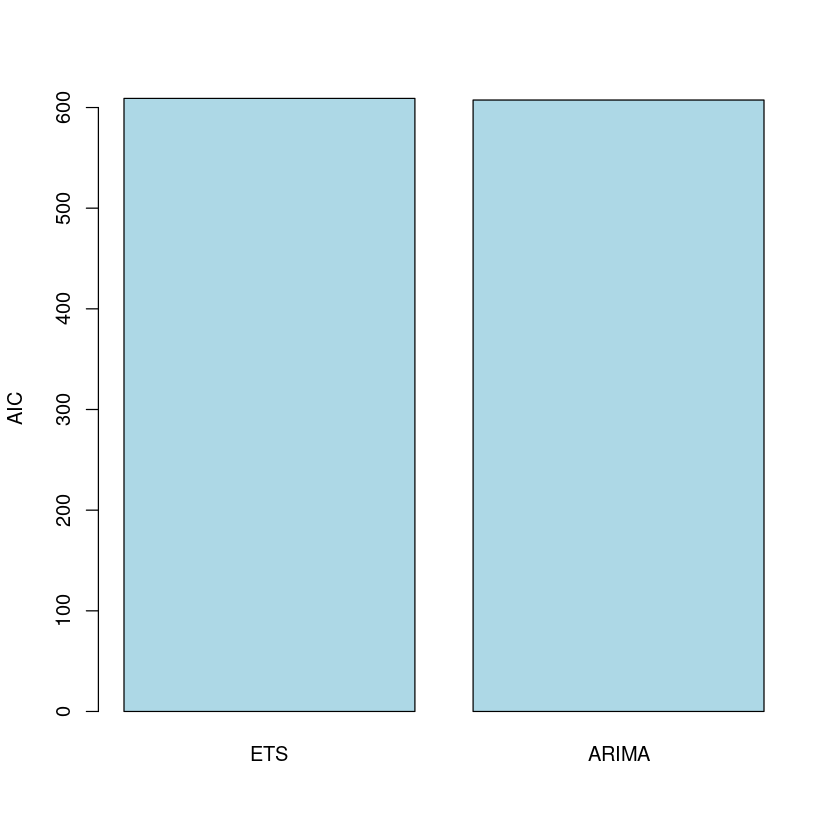

In [ ]:
barplot(c(ETS = model_ets$aic, ARIMA=model_arima$aic), col = "light blue", ylab = "AIC")